In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 10.5 MB/s 
     |████████████████████████████████| 9.9 MB 58.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/DataSets/Project


Mounted at /content/drive
/content/drive/My Drive/DataSets/Project


In [4]:
df = pd.read_csv("Cleaned.csv",parse_dates=["DATE"],index_col=["DATE"])

In [5]:
df.head(n=20)

,BEVERAGE CLEAR FLAVOUR
DATE,
2019-01-19,66208
2019-02-19,51019
2019-03-19,81595
2019-04-19,106862
2019-05-19,171290
2019-06-19,118716
2019-07-19,102192
2019-08-19,136872
2019-09-19,119343


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45 entries, 2019-01-19 to 2022-09-22
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   BEVERAGE CLEAR FLAVOUR  45 non-null     int64
dtypes: int64(1)
memory usage: 720.0 bytes


In [7]:
df.isnull().sum()

BEVERAGE CLEAR FLAVOUR    0
dtype: int64

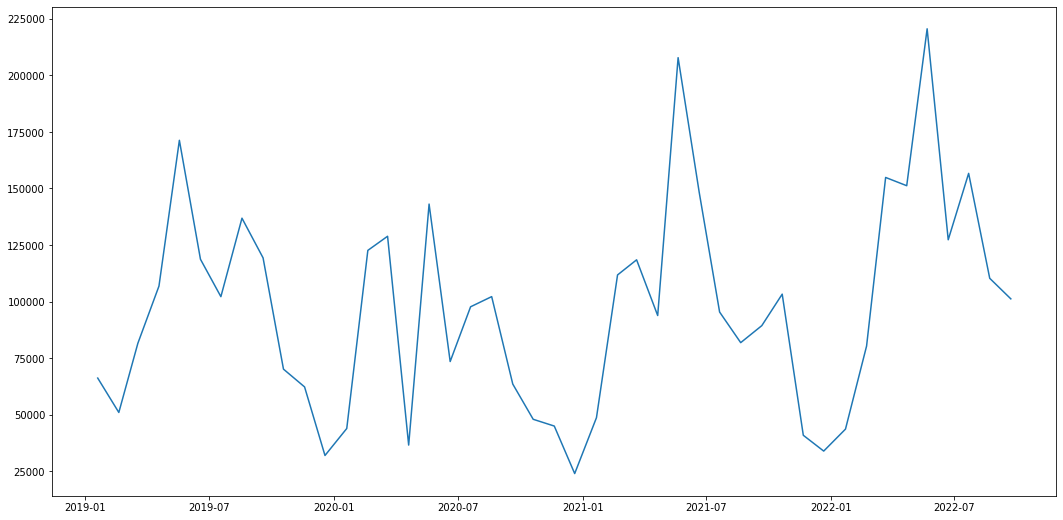

In [8]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["BEVERAGE CLEAR FLAVOUR"], linestyle="-")
plt.xlabel=('DATE')
plt.ylabel=('BEVERAGE CLEAR FLAVOUR')
plt.show();

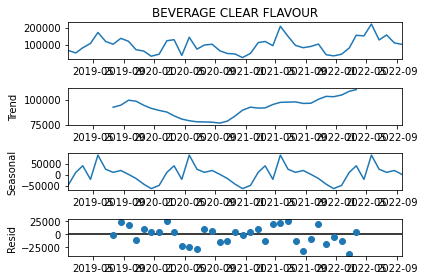

In [9]:

a = seasonal_decompose(df['BEVERAGE CLEAR FLAVOUR'], model = "additive",period=12)
a.plot();

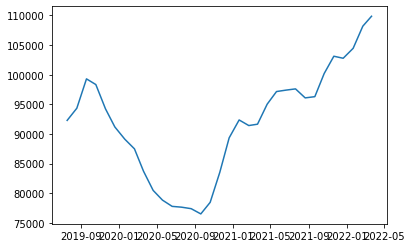

In [10]:
plt.plot(a.trend)

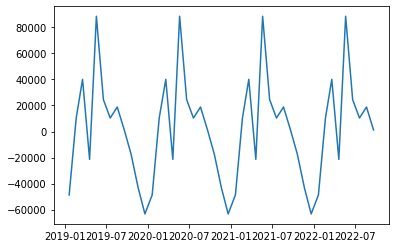

In [11]:
plt.plot(a.seasonal)

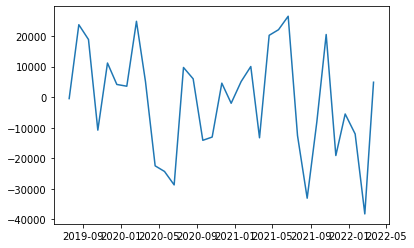

In [12]:
plt.plot(a.resid)

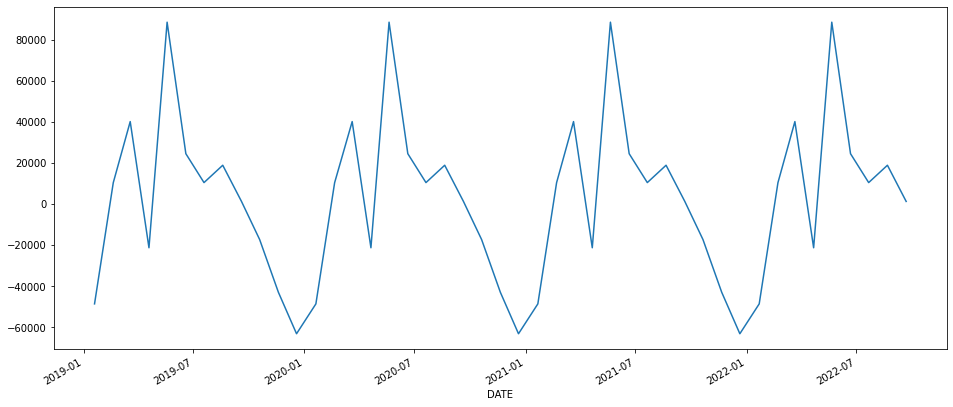

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [14]:
train_data = df[:len(df)-8]
test_data = df[len(df)-8:]

In [15]:
print(train_data.shape)
print(test_data.shape)

(37, 1)
(8, 1)


In [16]:
auto_arima(df['BEVERAGE CLEAR FLAVOUR'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   45
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -537.085
Date:                              Sun, 13 Nov 2022   AIC                           1082.170
Time:                                      15:17:47   BIC                           1089.397
Sample:                                           0   HQIC                          1084.864
                                               - 45                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.259e+04   2.55e+04      2.066      0.039    2689.687    1.02e+05
ar.L1          0.4581      0.224      2.045      0.041       0.019       0.897
ma.S.L12       0.4582      0.272      1.682      0.093      -0.076       0.992
sigma2      1.665e+09      0.504    3.3e+09      0.000    1.66e+09    1.66e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.99   Prob(JB):                         0.43
Heteroskedasticity (H):               1.20   Skew:                             0.47
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.13e+25. Standard errors may be unstable.
"""

SARIMAX Results
Dep. Variable:	y	No. Observations:	45
Model:	SARIMAX(1, 0, 0)x(0, 0, [1], 12)	Log Likelihood	-537.085
Date:	Sat, 22 Oct 2022	AIC	1082.170
Time:	10:05:02	BIC	1089.397
Sample:	0	HQIC	1084.864
- 45		
Covariance Type:	opg		
coef	std err	z	P>|z|	[0.025	0.975]
intercept	5.259e+04	2.55e+04	2.066	0.039	2689.687	1.02e+05
ar.L1	0.4581	0.224	2.045	0.041	0.019	0.897
ma.S.L12	0.4582	0.272	1.682	0.093	-0.076	0.992
sigma2	1.665e+09	0.504	3.3e+09	0.000	1.66e+09	1.66e+09
Ljung-Box (L1) (Q):	0.00	Jarque-Bera (JB):	1.68
Prob(Q):	0.99	Prob(JB):	0.43
Heteroskedasticity (H):	1.20	Skew:	0.47
Prob(H) (two-sided):	0.73	Kurtosis:	3.02


Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.95e+29. Standard errors may be unstable.

In [17]:
arima_model = SARIMAX(train_data['BEVERAGE CLEAR FLAVOUR'], order=(1,0,0), seasonal_order = (0,0,1,12))
arima_result = arima_model.fit()
print(arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:               BEVERAGE CLEAR FLAVOUR   No. Observations:                   37
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -445.919
Date:                              Sun, 13 Nov 2022   AIC                            897.837
Time:                                      15:17:47   BIC                            902.670
Sample:                                           0   HQIC                           899.541
                                               - 37                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8460      0.122      6.948      0.000       0.607       1.085
ma.S.L12       0.46

In [18]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

37    51355.054967
38    52249.584702
39    59214.749551
40    92528.164190
41    73194.597143
42    40557.310185
43    34577.680294
44    43345.676801
Name: ARIMA Predictions, dtype: float64

In [19]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_absolute_error


arima_rmse_error = rmse(test_data['BEVERAGE CLEAR FLAVOUR'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['BEVERAGE CLEAR FLAVOUR'].mean()
r2_score_arima = r2_score(test_data['BEVERAGE CLEAR FLAVOUR'],arima_pred) 
MAPE_arima = mean_absolute_percentage_error(test_data['BEVERAGE CLEAR FLAVOUR'], arima_pred)
MAD_arima = arima_pred.mad()
MAE_arima = mean_absolute_error(test_data['BEVERAGE CLEAR FLAVOUR'], arima_pred)

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}\nr2_score : {r2_score_arima}\nMAPE : {MAPE_arima}\nMAD : {MAD_arima}\nMAE: {MAE_arima}')

MSE Error: 7716449019.212764
RMSE Error: 87843.32085715319
Mean: 97061.93333333333
r2_score : -3.6830079310605317
MAPE : 0.5796333328426556
MAD : 14325.988549092865
MAE: 81941.77277104737


In [20]:
test_data['ARIMA_Predictions'] = list(arima_pred)

In [21]:
test_data = test_data.drop(columns=['ARIMA_Predictions'],axis=1)

In [22]:
test_data.head(n=8)

,BEVERAGE CLEAR FLAVOUR
DATE,
2022-02-22,80353
2022-03-22,154875
2022-04-22,151222
2022-05-22,220567
2022-06-22,127335
2022-07-22,156678
2022-08-22,110304
2022-09-22,101223


In [23]:
test_data_copy = test_data.copy()
test_data_copy['ARIMA_Predictions'] = list( arima_pred)

In [24]:
test_data_copy.head(n=8)

,BEVERAGE CLEAR FLAVOUR,ARIMA_Predictions
DATE,,
2022-02-22,80353,51355.054967
2022-03-22,154875,52249.584702
2022-04-22,151222,59214.749551
2022-05-22,220567,92528.164190
2022-06-22,127335,73194.597143
2022-07-22,156678,40557.310185
2022-08-22,110304,34577.680294
2022-09-22,101223,43345.676801


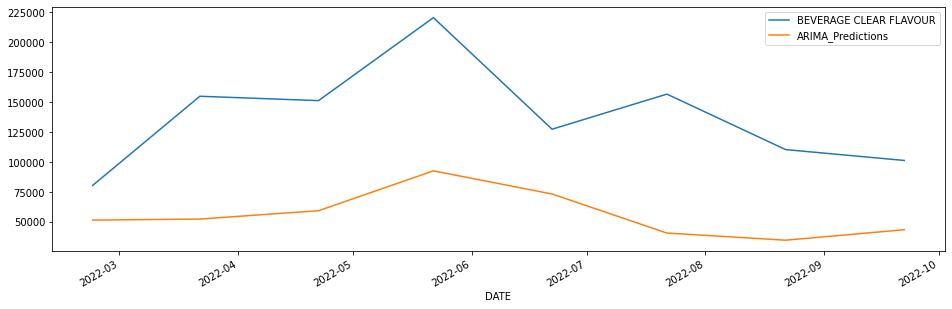

In [25]:
test_data_copy['BEVERAGE CLEAR FLAVOUR'].plot(figsize = (16,5), legend=True)
test_data_copy['ARIMA_Predictions'].plot(legend = True)

#### LSTM Forecast

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator
#TimeseriesGenerator to automatically transform both univariate and multivariate time series data into samples, ready to train deep learning models.
n_input = 3
n_features= 1
'''
length: The number of lag observations to use in the input portion of each sample (e.g. 3).
batch_size: The number of samples to return on each iteration (e.g. 32).
'''
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [30]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
34/34 [==============================] - 6s 15ms/step - loss: 0.0834
Epoch 2/20
34/34 [==============================] - 1s 16ms/step - loss: 0.0566
Epoch 3/20
34/34 [==============================] - 1s 16ms/step - loss: 0.0617
Epoch 4/20
34/34 [==============================] - 0s 13ms/step - loss: 0.0571
Epoch 5/20
34/34 [==============================] - 1s 21ms/step - loss: 0.0516
Epoch 6/20
34/34 [==============================] - 1s 20ms/step - loss: 0.0563
Epoch 7/20
34/34 [==============================] - 1s 21ms/step - loss: 0.0532
Epoch 8/20
34/34 [==============================] - 1s 29ms/step - loss: 0.0587
Epoch 9/20
34/34 [==============================] - 1s 20ms/step - loss: 0.0550
Epoch 10/20
34/34 [==============================] - 0s 14ms/step - loss: 0.0531
Epoch 11/20
34/34 [==============================] - 1s 16ms/step - loss: 0.0536
Epoch 12/20
34/34 [==============================] - 1s 18ms/step - loss: 0.0513
Epoch 13/20
34/34 [==================

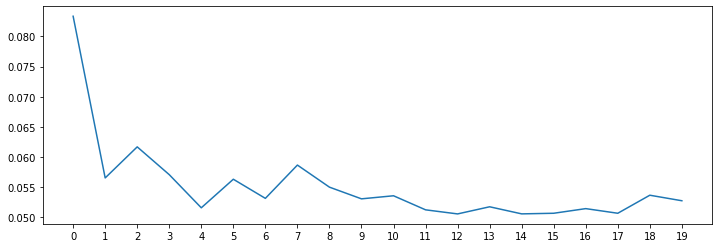

In [31]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [32]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 75ms/step


In [33]:
lstm_predictions_scaled

[array([0.2732655], dtype=float32),
 array([0.30408293], dtype=float32),
 array([0.31198803], dtype=float32),
 array([0.31071264], dtype=float32),
 array([0.3105838], dtype=float32),
 array([0.31020245], dtype=float32),
 array([0.3101582], dtype=float32),
 array([0.31011012], dtype=float32)]

In [34]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [35]:
test_data_copy['LSTM_Predictions'] = lstm_predictions

In [36]:
test_data_copy['ARIMA_Predictions'] = list(arima_pred)

In [37]:
test_data_copy

,BEVERAGE CLEAR FLAVOUR,ARIMA_Predictions,LSTM_Predictions
DATE,,,
2022-02-22,80353,51355.054967,74240.107823
2022-03-22,154875,52249.584702,79904.226218
2022-04-22,151222,59214.749551,81357.151209
2022-05-22,220567,92528.164190,81122.739558
2022-06-22,127335,73194.597143,81099.060119
2022-07-22,156678,40557.310185,81028.969419
2022-08-22,110304,34577.680294,81020.835261
2022-09-22,101223,43345.676801,81011.999977


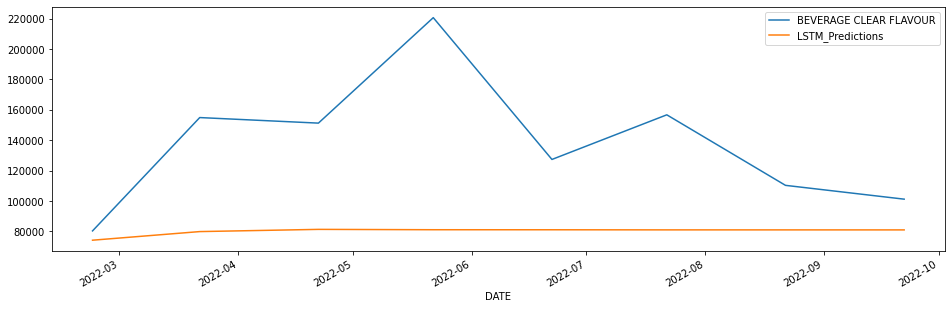

In [38]:
test_data_copy['BEVERAGE CLEAR FLAVOUR'].plot(figsize = (16,5), legend=True)
test_data_copy['LSTM_Predictions'].plot(legend = True);

In [39]:
lstm_rmse_error = rmse(test_data_copy['BEVERAGE CLEAR FLAVOUR'], test_data_copy["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['BEVERAGE CLEAR FLAVOUR'].mean()
r2_score_lstm = r2_score(test_data_copy['BEVERAGE CLEAR FLAVOUR'],test_data_copy["LSTM_Predictions"]) 
MAPE_lstm = mean_absolute_percentage_error(test_data_copy['BEVERAGE CLEAR FLAVOUR'], test_data_copy["LSTM_Predictions"])
MAD_lstm = test_data_copy["LSTM_Predictions"].mad()
MAE_lstm = mean_absolute_error(test_data['BEVERAGE CLEAR FLAVOUR'], lstm_predictions)

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}\nr2_score : {r2_score_lstm}\nMAPE : {MAPE_lstm}\nMAD : {MAD_lstm}\nMAE: {MAE_lstm}')



MSE Error: 4888788682.831482
RMSE Error: 69919.87330388608
Mean: 97061.93333333333
r2_score : -1.9669393419143564
MAPE : 0.3706799042307848
MAD : 1512.9845887348056
MAE: 57721.48880203068


#### Prophet Forecast

In [40]:
!conda install -c conda-forge fbprophet -y

/bin/bash: conda: command not found


In [41]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 481 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [42]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.5 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.3 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6639031 sha256=be3101aafaec6a703c547b2b08ef1b5f5b60efd0faa2335d5ff64cf54b22bb4c
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [43]:
from fbprophet import Prophet

In [44]:
df_pr = df.copy()
df_pr = df.reset_index()

In [45]:
df_pr.head()

,DATE,BEVERAGE CLEAR FLAVOUR
0,2019-01-19,66208
1,2019-02-19,51019
2,2019-03-19,81595
3,2019-04-19,106862
4,2019-05-19,171290


In [46]:
# To use prophet column names should be like that
df_pr.columns = ['ds','y']

In [47]:
train_data_pr = df_pr.iloc[:len(df)-8]
test_data_pr = df_pr.iloc[len(df)-8:]

In [48]:
print(train_data_pr.shape)
print(test_data_pr.shape)

(37, 2)
(8, 2)


In [49]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(test_data_pr)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-9:]['ds'], "Pred" : prophet_pred[-9:]["yhat"]})

In [51]:
prophet_pred = prophet_pred.set_index("Date")

In [52]:
prophet_pred

,Pred
Date,
2022-02-22,119128.579930
2022-03-22,130949.629237
2022-04-22,53375.715291
2022-05-22,189014.420888
2022-06-22,131834.377599
2022-07-22,111703.831255
2022-08-22,89763.795999
2022-09-22,83690.348960


In [53]:
test_data_copy["Prophet_Predictions"] = prophet_pred['Pred'].values

In [54]:
import seaborn as sns

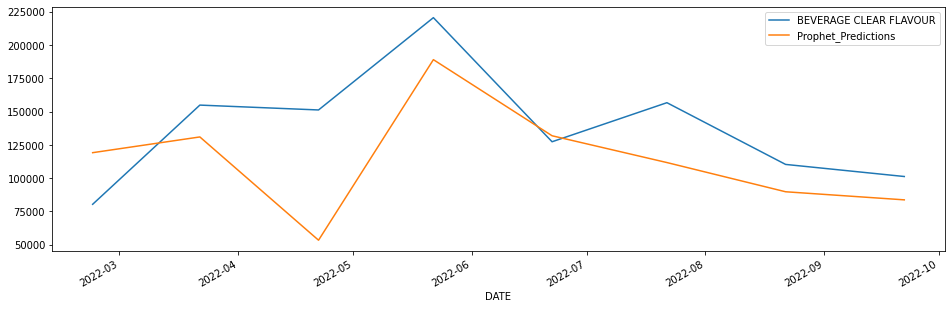

In [55]:
test_data_copy['BEVERAGE CLEAR FLAVOUR'].plot(figsize = (16,5), legend=True)
test_data_copy['Prophet_Predictions'].plot(legend = True)

In [56]:
prophet_rmse_error = rmse(test_data_copy['BEVERAGE CLEAR FLAVOUR'], test_data_copy["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['BEVERAGE CLEAR FLAVOUR'].mean()
r2_score_prophet = r2_score(test_data_copy['BEVERAGE CLEAR FLAVOUR'],test_data_copy["Prophet_Predictions"]) 
MAPE_prophet = mean_absolute_percentage_error(test_data_copy['BEVERAGE CLEAR FLAVOUR'], test_data_copy["Prophet_Predictions"])
MAD_prophet = test_data_copy['Prophet_Predictions'].mad()
MAE_prophet = mean_absolute_error(test_data['BEVERAGE CLEAR FLAVOUR'], test_data_copy['Prophet_Predictions'])

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}\nr2_score : {r2_score_prophet}\nMAPE : {MAPE_prophet}\nMAD : {MAD_arima}\nMAE: {MAE_arima}')



MSE Error: 1927205466.3893342
RMSE Error: 43899.94836431285
Mean: 97061.93333333333
r2_score : -0.16959477881773255
MAPE : 0.26361784650008385
MAD : 14325.988549092865
MAE: 81941.77277104737


## **GRU**

In [57]:
df_gru = pd.read_csv("Cleaned.csv",parse_dates=["DATE"])

In [58]:
df_gru.head()

,DATE,BEVERAGE CLEAR FLAVOUR
0,2019-01-19,66208
1,2019-02-19,51019
2,2019-03-19,81595
3,2019-04-19,106862
4,2019-05-19,171290


In [59]:
date = df_gru["DATE"]
beverage = df_gru["BEVERAGE CLEAR FLAVOUR"]

In [60]:
df_gru = df_gru.drop("DATE",axis=1)

In [61]:

train_data_gru = df_gru.iloc[:len(df)-9]
test_data_gru = df_gru.iloc[len(df)-9:]

In [62]:
print(train_data_gru.shape)
print(test_data_gru.shape)

(36, 1)
(9, 1)


In [63]:
df_gru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   BEVERAGE CLEAR FLAVOUR  45 non-null     int64
dtypes: int64(1)
memory usage: 488.0 bytes


In [64]:
# train_data_gru['DATE'] = train_data_gru['DATE'].astype('datetime64[D]').values.dtype
# test_data_gru['DATE'] = test_data_gru['DATE'].astype('datetime64[D]').values.dtype

In [65]:
# train_data_gru = train_data_gru.drop('DATE', axis = 1)
# test_data_gru = test_data_gru.drop('DATE', axis = 1)

In [66]:
scaler = MinMaxScaler().fit(train_data_gru)
train_scaled_gru = scaler.transform(train_data_gru)
test_scaled_gru = scaler.transform(test_data_gru)

In [67]:
train_scaled_gru.shape

(36, 1)

In [68]:
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 1
X_train, y_train = create_dataset(train_scaled_gru,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled_gru,LOOK_BACK)

In [69]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape) 
print("y_test.shape: ", y_test.shape)

X_train.shape:  (35, 1, 1)
y_train.shape:  (35, 1)
X_test.shape:  (8, 1, 1)
y_test.shape:  (8, 1)


In [70]:
X_test

array([[[0.10687937]],

       [[0.30652463]],

       [[0.71198503]],

       [[0.69210973]],

       [[1.06940303]],

       [[0.56214499]],

       [[0.72179482]],

       [[0.46948247]]])

In [71]:
X_test.shape

(8, 1, 1)

In [72]:
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
model = Sequential()
# Input layer
model.add(GRU (units = 64, return_sequences = True, 
input_shape = [X_train.shape[1], X_train.shape[2]]))
model.add(Dropout(0.2)) 
# Hidden layer
model.add(GRU(units = 64)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
#Compile model
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 64)             12864     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [73]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])

Epoch 1/100
2/2 [==============================] - 7s 743ms/step - loss: 0.1909 - val_loss: 0.1238
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 0.1635 - val_loss: 0.0984
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.1365 - val_loss: 0.0763
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1170 - val_loss: 0.0575
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0985 - val_loss: 0.0421
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0808 - val_loss: 0.0307
Epoch 7/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0710 - val_loss: 0.0234
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0626 - val_loss: 0.0206
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0579 - val_loss: 0.0219
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0524 - val_loss: 0.0262
Epoch 11/100
2/2 [

In [74]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

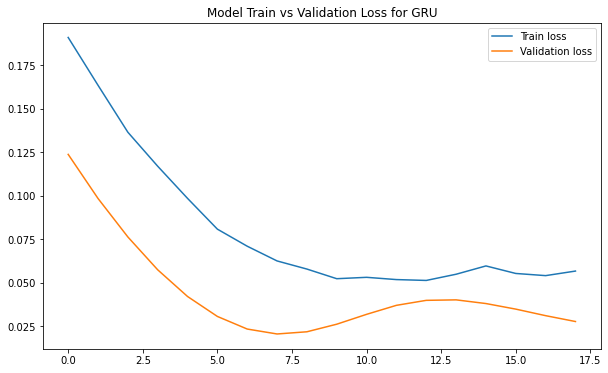

In [75]:
def plot_loss(history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss(history, 'GRU')


In [76]:
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)

1/1 [==============================] - 1s 1s/step


In [77]:
prediction

array([[ 79776.59 ],
       [ 92969.2  ],
       [119676.41 ],
       [118372.42 ],
       [142979.36 ],
       [109829.76 ],
       [120319.734],
       [103724.89 ]], dtype=float32)

In [78]:
test_data_copy['GRU_Predictions'] = prediction

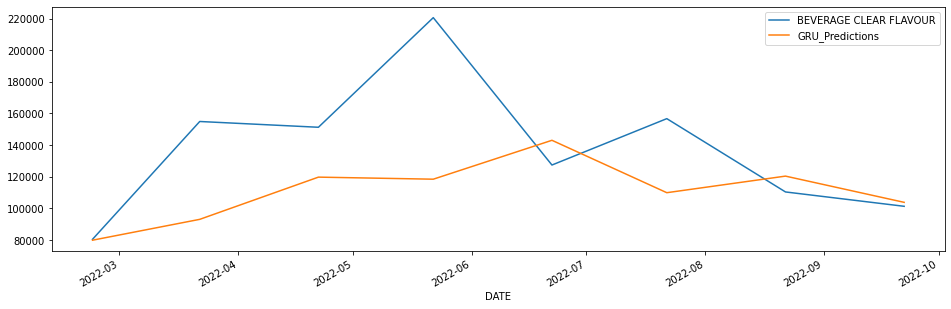

In [79]:
test_data_copy['BEVERAGE CLEAR FLAVOUR'].plot(figsize = (16,5), legend=True)
test_data_copy['GRU_Predictions'].plot(legend = True)

In [80]:
gru_rmse_error = rmse(y_test, prediction)
gru_mse_error = gru_rmse_error**2
errors = prediction - y_test
mean_value = np.square(errors).mean()

r2_score_gru = r2_score(y_test, prediction) 
MAPE_gru = mean_absolute_percentage_error(y_test, prediction)
MAD_gru = test_data_copy['GRU_Predictions'].mad()
MAE_gru = mean_absolute_error(test_data['BEVERAGE CLEAR FLAVOUR'], test_data_copy['GRU_Predictions'])


print(f'MSE Error: {gru_mse_error}\nRMSE Error: {gru_rmse_error}\nMean: {mean_value}\nr2_score : {r2_score_gru}\nMASE : {MAPE_gru}\nMAD : {MAD_gru}\nMAE: {MAE_gru}')

MSE Error: [2.2271993e+09]
RMSE Error: [47193.21241207]
Mean: 2227199297.7704234
r2_score : -0.3516569538063785
MASE : 0.20202582471425828
MAD : 14380.9345703125
MAE: 33904.0751953125


In [81]:
test_data_copy

,BEVERAGE CLEAR FLAVOUR,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions,GRU_Predictions
DATE,,,,,
2022-02-22,80353,51355.054967,74240.107823,119128.579930,79776.593750
2022-03-22,154875,52249.584702,79904.226218,130949.629237,92969.203125
2022-04-22,151222,59214.749551,81357.151209,53375.715291,119676.406250
2022-05-22,220567,92528.164190,81122.739558,189014.420888,118372.421875
2022-06-22,127335,73194.597143,81099.060119,131834.377599,142979.359375
2022-07-22,156678,40557.310185,81028.969419,111703.831255,109829.757812
2022-08-22,110304,34577.680294,81020.835261,89763.795999,120319.734375
2022-09-22,101223,43345.676801,81011.999977,83690.348960,103724.890625


### XGBoost

In [82]:
import xgboost as xgb

In [83]:
df_xgb = pd.read_csv("Cleaned.csv",parse_dates=["DATE"])

In [84]:
train_data_xgb = df_xgb.iloc[:len(df_xgb)-8]
test_data_xgb = df_xgb.iloc[len(df_xgb)-8:]

In [85]:
print(train_data_xgb.shape)
print(test_data_xgb.shape)

(37, 2)
(8, 2)


In [86]:
from sklearn.model_selection import train_test_split
y = df_xgb['BEVERAGE CLEAR FLAVOUR']
X = df_xgb.drop(columns=['DATE'],axis=1)
X_train = X[:len(df_xgb)-8]
y_train = y[:len(df_xgb)-8]
X_test = X[len(df_xgb)-8:]
y_test = y[len(df_xgb)-8:]

In [87]:
X.head()

,BEVERAGE CLEAR FLAVOUR
0,66208
1,51019
2,81595
3,106862
4,171290


In [88]:
y.head()

0     66208
1     51019
2     81595
3    106862
4    171290
Name: BEVERAGE CLEAR FLAVOUR, dtype: int64

In [89]:
y_train.head()

0     66208
1     51019
2     81595
3    106862
4    171290
Name: BEVERAGE CLEAR FLAVOUR, dtype: int64

In [90]:
X_train.head()

,BEVERAGE CLEAR FLAVOUR
0,66208
1,51019
2,81595
3,106862
4,171290


In [91]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

[15:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [92]:
prediction_xgb = reg.predict(X_test)

In [93]:
test_data_copy['Xgboost_Predictions'] = prediction_xgb

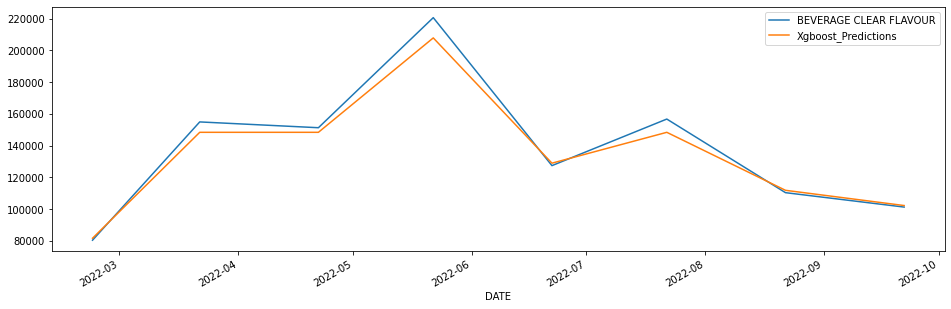

In [94]:
test_data_copy['BEVERAGE CLEAR FLAVOUR'].plot(figsize = (16,5), legend=True)
test_data_copy['Xgboost_Predictions'].plot(legend = True)

In [95]:
xgb_rmse_error = rmse(y_test, prediction_xgb)
xgb_mse_error = xgb_rmse_error**2
errors = prediction_xgb - y_test
mean_value = np.square(errors).mean()

r2_score_xgb = r2_score(y_test, prediction_xgb) 
MAPE_xgb = mean_absolute_percentage_error(y_test, prediction_xgb)
MAD_xgb = test_data_copy['Xgboost_Predictions'].mad()
MAE_xgb = mean_absolute_error(test_data['BEVERAGE CLEAR FLAVOUR'], test_data_copy['Xgboost_Predictions'])
print(f'MSE Error: {xgb_mse_error}\nRMSE Error: {xgb_rmse_error}\nMean: {mean_value}\nr2_score : {r2_score_xgb}\nMAPE : {MAPE_xgb}\nMAD : {MAD_xgb}\nMAE: {MAE_xgb}')

MSE Error: 36350991.97480774
RMSE Error: 6029.178383064125
Mean: 36350991.97480774
r2_score : 0.9779390775088268
MAPE : 0.027902935289451904
MAD : 28541.3125
MAE: 4474.5625


#### Randomforest Regresssor

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
model_rnd = RandomForestRegressor(n_estimators=1000)
model_rnd.fit(X_train, y_train)
# make a one-step prediction
prediction_random = model_rnd.predict(X_test)

In [98]:
test_data_copy['Random_Forest_Predictions'] = prediction_random

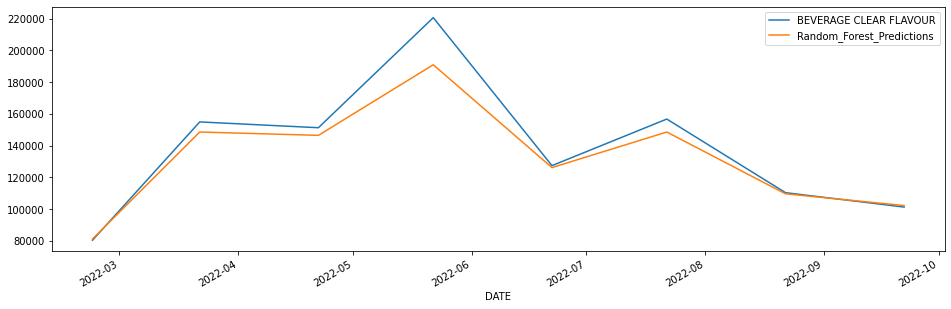

In [99]:
test_data_copy['BEVERAGE CLEAR FLAVOUR'].plot(figsize = (16,5), legend=True)
test_data_copy['Random_Forest_Predictions'].plot(legend = True)

In [100]:
random_rmse_error = rmse(y_test, prediction_random)
random_mse_error = random_rmse_error**2
errors = prediction_random - y_test
mean_value = np.square(errors).mean()

r2_score_random = r2_score(y_test, prediction_random) 
MAPE_random = mean_absolute_percentage_error(y_test, prediction_random)


MAD_random = test_data_copy['Random_Forest_Predictions'].mad()
MAE_random = mean_absolute_error(test_data['BEVERAGE CLEAR FLAVOUR'], test_data_copy['Random_Forest_Predictions'])


print(f'MSE Error: {random_mse_error}\nRMSE Error: {random_rmse_error}\nMean: {mean_value}\nr2_score : {r2_score_random}\nMAPE : {MAPE_random}\nMAD : {MAD_random}\nMAE: {MAE_random}')

MSE Error: 126763879.18243515
RMSE Error: 11258.94662845664
Mean: 126763879.18243515
r2_score : 0.9230687262877937
MAPE : 0.03687535383068455
MAD : 26918.087375000003
MAE: 6588.336375000001


In [101]:
test_data_copy.head(n=8)

,BEVERAGE CLEAR FLAVOUR,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions,GRU_Predictions,Xgboost_Predictions,Random_Forest_Predictions
DATE,,,,,,,
2022-02-22,80353,51355.054967,74240.107823,119128.579930,79776.593750,81595.015625,81141.014
2022-03-22,154875,52249.584702,79904.226218,130949.629237,92969.203125,148326.984375,148513.313
2022-04-22,151222,59214.749551,81357.151209,53375.715291,119676.406250,148326.984375,146413.815
2022-05-22,220567,92528.164190,81122.739558,189014.420888,118372.421875,207810.828125,190897.579
2022-06-22,127335,73194.597143,81099.060119,131834.377599,142979.359375,128886.015625,126097.639
2022-07-22,156678,40557.310185,81028.969419,111703.831255,109829.757812,148326.984375,148513.313
2022-08-22,110304,34577.680294,81020.835261,89763.795999,120319.734375,111788.945312,109579.166
2022-09-22,101223,43345.676801,81011.999977,83690.348960,103724.890625,102191.304688,102175.502


In [102]:
# rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error,gru_rmse_error[0],xgb_rmse_error,random_rmse_error]
# mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error,gru_mse_error[0],xgb_mse_error,random_mse_error]
# r2_errors = [r2_score_arima,r2_score_lstm,r2_score_prophet,r2_score_gru,r2_score_xgb,r2_score_random]
# MAPE_errors = [MAPE_arima,MAPE_lstm,MAPE_prophet,MAPE_gru,MAPE_xgb,MAPE_random]
# MAD_errors = [MAD_arima,MAD_lstm,MAD_prophet,MAD_gru,MAD_xgb,MAD_random]

# MAE_errors = [MAE_arima,MAE_lstm,MAE_prophet,MAE_gru,MAE_xgb,MAE_random]

# total_errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet","GRU","Xgboost","Random_Forest"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors, "R2 Errors":r2_errors,
#                              "MAPE Errors": MAPE_errors,
#                              "MAD Errors": MAD_errors,
#                              "MAE Errors": MAE_errors})

In [103]:
# total_errors.head(n=6)

In [104]:
# plt.figure(figsize=(16,9))
# plt.plot_date(test_data_copy.index, test_data_copy["BEVERAGE CLEAR FLAVOUR"], linestyle="-")
# plt.plot_date(test_data_copy.index, test_data_copy["ARIMA_Predictions"], linestyle="-.")
# plt.plot_date(test_data_copy.index, test_data_copy["LSTM_Predictions"], linestyle="--")
# plt.plot_date(test_data_copy.index, test_data_copy["Prophet_Predictions"], linestyle=":")
# plt.plot_date(test_data_copy.index, test_data_copy["GRU_Predictions"], linestyle="-")
# plt.plot_date(test_data_copy.index, test_data_copy["Xgboost_Predictions"], linestyle="-.")
# plt.plot_date(test_data_copy.index, test_data_copy["Random_Forest_Predictions"], linestyle="--")
# plt.legend(['BEVERAGE CLEAR FLAVOUR','ARIMA_Predictions','LSTM_Predictions','Prophet_Predictions','GRU_Predictions','Xgboost_Predictions','Random_Forest_Predictions'])
# plt.show()

# Artificial Neural Networks for Time Series Forecasting

## MLPs - Multi Layer Perceptrons

In [106]:
df_mlp = pd.read_csv("Cleaned.csv",parse_dates=["DATE"])
date = df_mlp["DATE"]
beverage = df_mlp["BEVERAGE CLEAR FLAVOUR"]
df_mlp = df_mlp.drop("DATE",axis=1)
train_data_mlp = df_mlp.iloc[:len(df_mlp)-9]
test_data_mlp = df_mlp.iloc[len(df_mlp)-9:]

In [107]:
print(train_data_mlp.shape)
print(test_data_mlp.shape)

(36, 1)
(9, 1)


In [108]:
from sklearn.preprocessing import RobustScaler,StandardScaler
cols = ["BEVERAGE CLEAR FLAVOUR"]
scaler = StandardScaler().fit(train_data_mlp)
train_scaled_mlp = scaler.transform(train_data_mlp)
test_scaled_mlp = scaler.transform(test_data_mlp)

In [109]:
print(train_data_mlp.shape)
print(test_data_mlp.shape)

(36, 1)
(9, 1)


In [110]:
def create_dataset(X, time_steps=1):
   Xs, ys = [], []
   for i in range(len(X)-time_steps):
    v = X[i:i+time_steps]
    Xs.append(v)
    ys.append(X[i+time_steps])
 
   return np.array(Xs), np.array(ys)

In [111]:
time_steps = 1
X_train, y_train = create_dataset(train_scaled_mlp,time_steps)
X_test, y_test = create_dataset(test_scaled_mlp,time_steps)
print(X_train.shape, y_train.shape)

(35, 1, 1) (35, 1)


In [112]:
mlp_model = tf.keras.Sequential()
mlp_model.add(tf.keras.layers.Dense(256, input_dim=X_train.shape[1], activation='relu'))
mlp_model.add(tf.keras.layers.Dense(128,activation='relu'))
mlp_model.add(tf.keras.layers.Dense(64,activation='relu'))
mlp_model.add(tf.keras.layers.Dense(32,activation='relu'))
mlp_model.add(tf.keras.layers.Dense(16,activation='relu'))
mlp_model.add(tf.keras.layers.Dense(8,activation='relu'))
mlp_model.add(tf.keras.layers.Dense(1))
mlp_model.compile(loss='mse', optimizer='adam')
mlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [113]:
mlp_history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, shuffle=False)

Epoch 1/100
2/2 [==============================] - 1s 162ms/step - loss: 1.0389 - val_loss: 2.2190
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.9892 - val_loss: 2.2239
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 0.9707 - val_loss: 2.2307
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 0.9533 - val_loss: 2.2279
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 0.9383 - val_loss: 2.2194
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.9252 - val_loss: 2.2162
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.9166 - val_loss: 2.2097
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 0.9134 - val_loss: 2.1929
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.9173 - val_loss: 2.1853
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 0.9302 - val_loss: 2.1715
Epoch 11/100
2/2 [

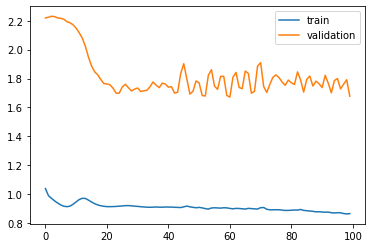

In [114]:
plt.plot(mlp_history.history['loss'], label='train')
plt.plot(mlp_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [115]:
prediction = mlp_model.predict(X_test)
prediction = scaler.inverse_transform(prediction)

1/1 [==============================] - 0s 70ms/step


In [116]:

test_data_copy['MLP_Predictions'] = prediction

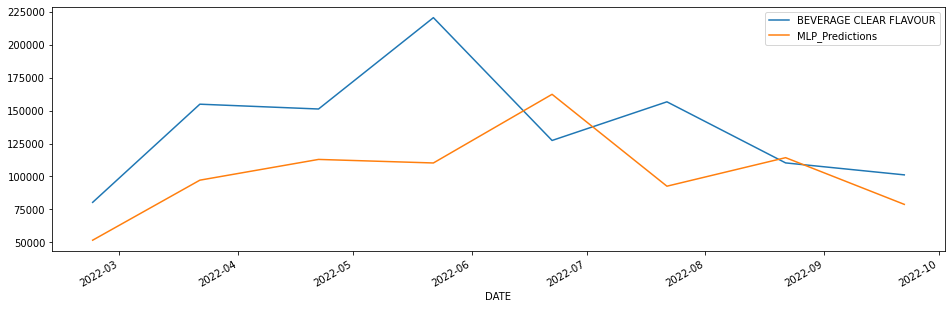

In [117]:
test_data_copy['BEVERAGE CLEAR FLAVOUR'].plot(figsize = (16,5), legend=True)
test_data_copy['MLP_Predictions'].plot(legend = True)

In [118]:
mlp_rmse_error = rmse(y_test, prediction)
mlp_mse_error = mlp_rmse_error**2
errors = prediction - y_test
mean_value = np.square(errors).mean()

r2_score_mlp = r2_score(y_test, prediction) 
MAPE_mlp = mean_absolute_percentage_error(y_test, prediction)
MAD_mlp = test_data_copy['MLP_Predictions'].mad()
MAE_mlp = mean_absolute_error(test_data['BEVERAGE CLEAR FLAVOUR'], test_data_copy['MLP_Predictions'])


print(f'MSE Error: {mlp_mse_error}\nRMSE Error: {mlp_rmse_error}\nMean: {mean_value}\nr2_score : {r2_score_mlp}\nMAPE : {MAPE_mlp}\nMAD : {MAD_mlp}\nMAE: {MAE_mlp}')

MSE Error: [2.2271993e+09]
RMSE Error: [106793.35102084]
Mean: 11404819822.259327
r2_score : -12188763732.474371
MASE : 145218.7987173616
MAD : 22446.640625
MAE: 45056.43994140625


In [119]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error,gru_rmse_error[0],xgb_rmse_error,random_rmse_error,mlp_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error,gru_mse_error[0],xgb_mse_error,random_mse_error,mlp_mse_error]
r2_errors = [r2_score_arima,r2_score_lstm,r2_score_prophet,r2_score_gru,r2_score_xgb,r2_score_random,r2_score_mlp]
MAPE_errors = [MAPE_arima,MAPE_lstm,MAPE_prophet,MAPE_gru,MAPE_xgb,MAPE_random,MAPE_mlp]
MAD_errors = [MAD_arima,MAD_lstm,MAD_prophet,MAD_gru,MAD_xgb,MAD_random,MAD_mlp]

MAE_errors = [MAE_arima,MAE_lstm,MAE_prophet,MAE_gru,MAE_xgb,MAE_random,MAE_mlp]

total_errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet","GRU","Xgboost","Random_Forest","MLP"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors, "R2 Errors":r2_errors,
                             "MAPE Errors": MAPE_errors,
                             "MAD Errors": MAD_errors,
                             "MAE Errors": MAE_errors})

In [120]:
total_errors.head(n=6)

,Models,RMSE Errors,MSE Errors,R2 Errors,MAPE Errors,MAD Errors,MAE Errors
0,ARIMA,87843.320857,7716449019.212764,-3.683008,0.579633,14325.988549,81941.772771
1,LSTM,69919.873304,4888788682.831482,-1.966939,0.370680,1512.984589,57721.488802
2,Prophet,43899.948364,1927205466.389334,-0.169595,0.263618,29049.164519,34955.776987
3,GRU,47193.212412,2227199297.770424,-0.351657,0.202026,14380.934570,33904.075195
4,Xgboost,6029.178383,36350991.974808,0.977939,0.027903,28541.312500,4474.562500
5,Random_Forest,11258.946628,126763879.182435,0.923069,0.036875,26918.087375,6588.336375


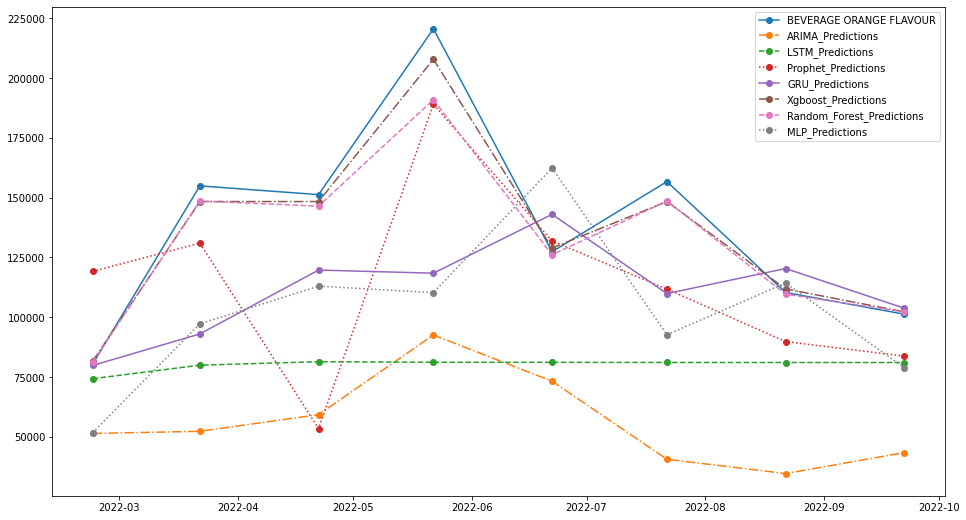

In [122]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data_copy.index, test_data_copy["BEVERAGE CLEAR FLAVOUR"], linestyle="-")
plt.plot_date(test_data_copy.index, test_data_copy["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data_copy.index, test_data_copy["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data_copy.index, test_data_copy["Prophet_Predictions"], linestyle=":")
plt.plot_date(test_data_copy.index, test_data_copy["GRU_Predictions"], linestyle="-")
plt.plot_date(test_data_copy.index, test_data_copy["Xgboost_Predictions"], linestyle="-.")
plt.plot_date(test_data_copy.index, test_data_copy["Random_Forest_Predictions"], linestyle="--")
plt.plot_date(test_data_copy.index, test_data_copy["MLP_Predictions"], linestyle=":")
plt.legend(['BEVERAGE ORANGE FLAVOUR','ARIMA_Predictions','LSTM_Predictions','Prophet_Predictions','GRU_Predictions','Xgboost_Predictions','Random_Forest_Predictions','MLP_Predictions'])
plt.show()